# Day 5 - Gradient descent for simple linear regression

Your goal is to use a simplified version of gradient descent to arrive at good choices for the $\beta$ coefficients $\beta_0$ and $\beta_1$

Given a set of $\beta$ coefficients, we can easily compute an performance measure (such as Residual Sum of Squares) of how well the linear model predicts the data.  Since RSS is a measure of error, we can also think of it as the cost of choosing that particular set of $\beta$ coefficients, given the data.  If we measured the cost for many values of $\beta$ selected from a grid, the costs would form a cost surface and, if our grid was sampled at small enough intervals, we could obtain a good estimate for $\beta$ by selecting the $\beta$ coefficients for which this cost surface was minimized. 

However, such a process would be expensive because we would be sampling $s^{(p+1)}$ locations (where $s$ is the number of grid samples per feature, and $p$ is the number of features).  We know that an exponential algorithm such as this is usually not ideal, so perhaps using a guided search which only looks at a tiny fraction of these points would be better.   If we imagine the shape of this cost surface landscape, we can think about being at a specific coordinate ($\beta$) and our goal is to move in the direction that reduces cost (RSS), then, given some assumptions about the landscape, we could use a fairly efficient search to find the coordinates of minimum cost.  More specifically, if the surface is convex, then we can use an optimization tool like gradient descent to find the minimum point on this cost surface. 

In this learning activity your goal is to implement a simplified version of gradient descent.  You will do this using the technique you may have learned in the very beginning of a calculus course - finding the instantaneous slope of the cost surface - but in this case we are operating in 2 dimensions, so we must find the gradient in each direction ($\beta_0$ and $\beta_1$) by evaluating the function for a small change (epsilon) in each direction.     If the cost function has only one local minimum, then the local minimum is the global minimum and a greedy search such as gradient descent could find it.  You will use this greedy search in two dimensions simultaneously ... the trick is figuring out how to use the gradient to pick the next point ($\beta_0$,$\beta_1$) to evaluate. 

Assuming your simplified gradient descent optimizer is working and reducing the RSS cost by improving the choice of $\beta$ coefficients, you will still need to determine a stopping criteria... otherwise the process will continue forever, trying to get slightly lower cost from the function.  The instructor has included stopping conditions in a later code cell which calls the function you will code to find the gradients.

Caution:  this dataset has very few points, so local gradient estimation using partial gradients in each direction ($\beta_0$,$\beta_1$) has very little gradient to descend on.  

This will make it slow and highly dependent on your starting beta.  
Normally there are other much-better numerical techniques to deal with this...  
This exercise is for illustration/learning only... Dont use this "simplified" gradient descent code on real problems!

Note that the process will likely run several 100Ks of iterations and may take a few moments to converge... so expect your cooling fans to kick in while it is running.


In [3]:
import numpy as np
import matplotlib.pyplot as plt

## Here is prewritten code to set up the dataset as a matrix

In [4]:
#code to load your matrix here
pretest_scores = np.array([95., 85., 80., 70., 60.]).T  #(5x1 array)
y = np.array([[85.,95.,70.,65.,70.]]).T

#build the design matrix X
X = np.vstack((np.ones(len(pretest_scores)),pretest_scores)).T                         



## Helper Functions and Utilities

In [5]:
#function to generate line points for plotting
def computeline(intercept,slope,start_x,end_x):
    points_x=[start_x,end_x]
    points_y=[intercept,intercept+slope*end_x]
    return points_x, points_y


def plot_regression_results(X, y, t, ythat, beta0,beta1):
    fig = plt.figure()
    plt.axis([0.,100.,0.,100.])
    #add the points in black
    plt.scatter(X[:,1],y,c='k',marker='x')
    #add the predicted final exam score for Aptitude test = 80
    plt.scatter(t[0,1],ythat,c='g',marker='o')
    #add the student line in blue
    points_x,points_y = computeline(beta0,beta1,0,100)
    plt.plot(points_x,points_y,c='r')
    plt.title('Simple Regression')
    plt.ylabel('Final Exam Score')
    plt.xlabel('Aptitude test score')
    #plt.axis('equal')
    plt.grid(True)
    plt.show()
    
    
def plot_rss_history(rssHistory):
    fig = plt.figure()
    #plt.axis([0.,100.,0.,100.])
    #add the points in black
    plt.plot(rssHistory)
    plt.title('Residuals History')
    plt.ylabel('Residual')
    plt.xlabel('iteration')
    #plt.axis('equal')
    plt.grid(True)
    plt.show()



## Code for the student's iterative search for the best coefficients
Complete the code stub below to compute and return the local gradient of the cost (error) surface in the immediate vicinity of the current values of the coefficients

STUDENT CODE - Within the function ```compute_gradient```, use ```numpy's``` ```dot()``` function to perform matrix multiplication (not a loop) to compute $\hat y$ (```yhat```) for all observations and the corresponding RSS using (```yhat```) the truth values (```y```).  Then, for an epsilon-sized change in each dimension (```beta[0]``` and ```beta[1]```) use the resulting estimates for your datapoints and the resulting epsilon-MSEs to compute a gradient in each direction (```errorGradient0``` for $\beta_0$'s gradient and ```errorGradient1``` for $\beta_1$'s gradient).

* Challenge 1:  Simply adding epsilon to the beta value would yield a gradient value which was computed slightly off center from the current location of $\beta$ - which means the algorithm might struggle to converge since it is choosing the next value of $\beta$ using a slightly incorrect gradient.  Rather than computing costs at beta and beta+epsilon, consider a gradient centered on epsilon (```beta+epsilon```, ```beta-epsilon```)
* Challenge 2:  While you could compute these gradients through individual hardcoded equations, you could also perform the calculation as a carefully constructed matrix multiplication... are you up to the challenge?

Hint  - determine the desired shape of the output and make the correct matrix multiplication before calling ```dot()```.  You may find it necessary to use ```numpy```'s transpose operator (```.T```) on one or both matrices.

Another Hint - If running the algorithm shows that RSS is growing worse, consider the possibility that your gradients signs are flipped... and fix your code here.

In [13]:
def compute_gradient(X,y,beta,epsilon):
    '''
    Given the training data and the current estimate for beta,
    compute the gradients in each dimension of beta
    Returns gradient
    '''
    
    errorGradient0 = 0   #placeholder - you will write code below to compute this
    errorGradient1 = 0   #placeholder - you will write code below to compute this
    
    #STUDENT CODE HERE 
    #compute the error gradients (slope of the error surface for a tiny change (epsilon) to the beta values)
    # to do this, recompute the value of the linear regression line over all datapoints using a epsilon-different set of coefficents
    # hint: If your algorithm appears to be maximizing the cost instead of minimizing the cost, check for sign errors in the gradients
    #-----------------------------------------------------------
    
    b0EpsMask = np.array([[+epsilon,-epsilon],[0,0]])
    b1EpsMask = np.array([[0,0],[+epsilon,-epsilon]])
    b0Eps = beta+b0EpsMask
    b1Eps = beta+b1EpsMask
 
    
    #determine which direction to go for each beta independently
    yhat0Eps = np.dot(X,b0Eps) #compute the possible yHats by altering only b0
    yhat1Eps = np.dot(X,b1Eps) #compute the possible yHats by altering only b1
           
    #compute current error
    yhat0Error = y-yhat0Eps
    yhat1Error = y-yhat1Eps
    
    #print(yhat0Error.shape)
    #done=True
    
    rss0Eps = np.diag(  np.dot((yhat0Error).T , (yhat0Error))  ) #using matrix mult to sum
    rss1Eps = np.diag(  np.dot((yhat1Error).T , (yhat1Error))  ) #using matrix mult to sum
    
    errorGradient0 = np.diff(rss0Eps, axis = 0) #find RSS gradient
    errorGradient1 = np.diff(rss1Eps, axis = 0) #find RSS gradient
    
    # YOUR CODE HERE
    #raise NotImplementedError()
    #--------------------------
    #END STUDENT CODE
    
    
    return [errorGradient0,errorGradient1]
    


## Guess Beta coefficients and evaluate the guess on the test point
(Optional) Here you get to define your initial conditions for the coefficients.   You can leave the originals or choose something different to see how the trajectory of the search goes.

one starting suggestion is:

```beta0 = 50.0``` , ```beta1 = 0.3```

Beta 
 [[50. ]
 [ 0.3]] 

Design Matrix X 
 [[ 1. 95.]
 [ 1. 85.]
 [ 1. 80.]
 [ 1. 70.]
 [ 1. 60.]] 

yhat 
 [[78.5]
 [75.5]
 [74. ]
 [71. ]
 [68. ]] 

ydif (prediction errors) 
 [[ -6.5]
 [-19.5]
 [  4. ]
 [  6. ]
 [ -2. ]] 


RSS:  [[478.5]] 

MSE:  [[95.7]] 

RMSE:  [[9.78263768]] 

Prediction at Aptitude 80 [[74.]] 



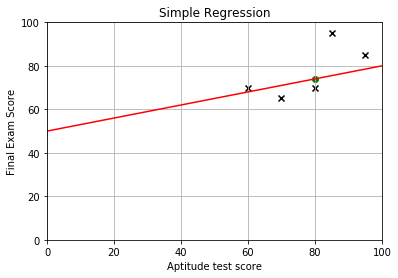

In [11]:
#beta guess here.  Note that later you will find this using gradient decent
#beta = np.array([[26.768,0.644]]).T    #guess the best betas (2 x 1 array)  

#STUDENT CODE HERE.... GUESS YOUR BETA VALUES FOR Beta0 and Beta1
#suggestion:  make the beta guess bad so you can watch the performance improvements
#--------------
beta0 = 50.0
beta1 = 0.3
#------------
#END STUDENT CODE


beta = np.array([[beta0,beta1]]).T      

#print the Betas and X's
print('Beta','\n', beta, '\n')
print('Design Matrix X', '\n', X, '\n')

#estimate yhat for all datapoints
yhat = np.dot(X,beta)

print('yhat','\n',  yhat,'\n')

#find the difference betwen predicted and truth 
ydiff = yhat-y
print('ydif (prediction errors)', '\n',ydiff, '\n')

#compute RSS
rss = np.dot(ydiff.T,ydiff)
#compute MSE
mse = rss/len(ydiff)
#compute RMSE
rmse =  np.sqrt(mse)
print()
print('RSS: ', rss, '\n')
print('MSE: ', mse, '\n')
print('RMSE: ',rmse, '\n')

#make prediction on aptitude test score of 80
t = np.array([[1, 80]])
ythat = np.dot(t,beta)
print('Prediction at Aptitude 80', ythat, '\n')
plot_regression_results(X, y, t, ythat, beta0, beta1)

## Use gradient descent to find good values for the coefficients

Note that the process will likely run several 100Ks of iterations and may take a few moments to converge.  The default stopping iteration is 200K... but if you want to try to get a more presise estimation once your gradient evaluator is working properly, you can increase the ```max_iterations``` value.

Caution: If your gradients are pointing in the wrong direction, your beta estimates will force the line AWAY from where it should be and the RSS will grow without bound until it exceeds the max value for the datatype... which usually ends the program.  If this is happening to you, you probably have a sign error in the gradient computation.

Starting beta search


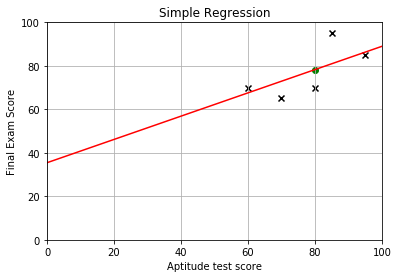

*** Iteration  10000  improvement 8.272091008620919e-05  updatedRss:  336.2230897076796 
  B0:  35.45963546430016  B1:  0.5351759049372504 





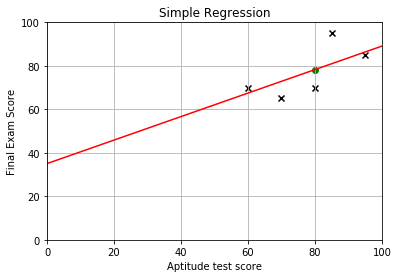

*** Iteration  20000  improvement 7.53200926055797e-05  updatedRss:  335.43346634035095 
  B0:  35.06230512193952  B1:  0.5401505250441005 





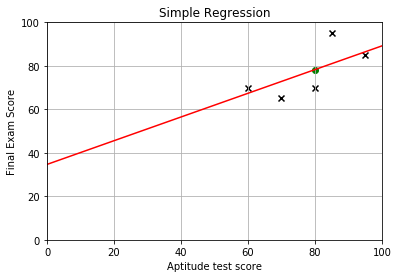

*** Iteration  30000  improvement 6.858140602616913e-05  updatedRss:  334.71448846496116 
  B0:  34.68316521540885  B1:  0.544897398869739 





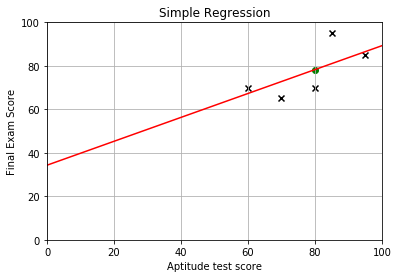

*** Iteration  40000  improvement 6.24456106947946e-05  updatedRss:  334.05983561810217 
  B0:  34.321382956622415  B1:  0.5494269530143356 





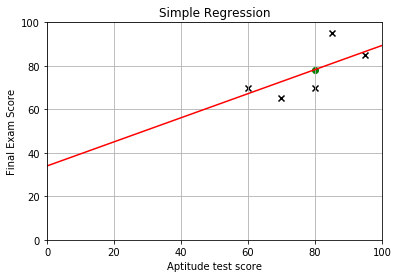

*** Iteration  50000  improvement 5.6858767948142486e-05  updatedRss:  333.4637528117165 
  B0:  33.9761636841223  B1:  0.553749136726924 





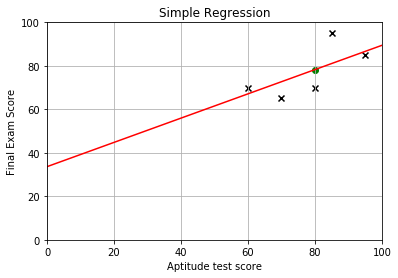

*** Iteration  60000  improvement 5.177176586812493e-05  updatedRss:  332.92099994046606 
  B0:  33.64674911696113  B1:  0.5578734437702224 





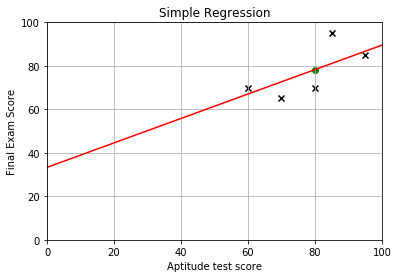

*** Iteration  70000  improvement 4.713988437288208e-05  updatedRss:  332.4268057178044 
  B0:  33.33241568988001  B1:  0.5618089332599994 





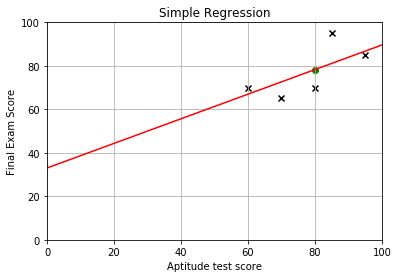

*** Iteration  80000  improvement 4.292240669201419e-05  updatedRss:  331.9768257311359 
  B0:  33.03247296343727  B1:  0.5655642495773237 





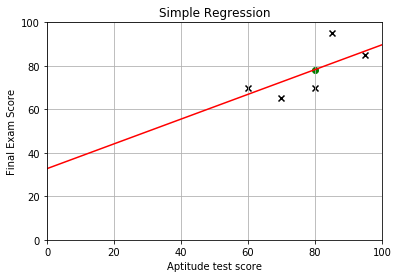

*** Iteration  90000  improvement 3.908225204440896e-05  updatedRss:  331.5671042513167 
  B0:  32.74626210796896  B1:  0.569147641341192 





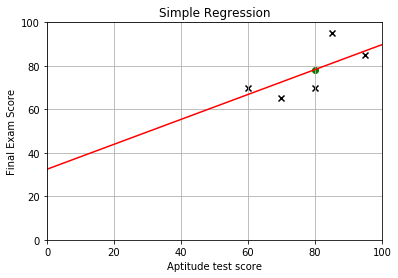

*** Iteration  100000  improvement 3.558566857009282e-05  updatedRss:  331.1940394568877 
  B0:  32.4731544555317  B1:  0.5725669795455588 





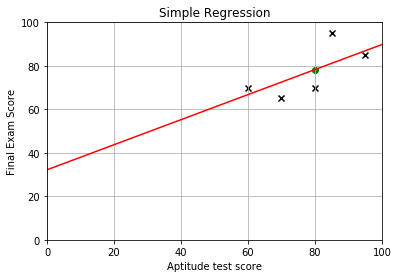

*** Iteration  110000  improvement 3.2401912790192e-05  updatedRss:  330.8543517723215 
  B0:  32.21255012005088  B1:  0.5758297748289352 





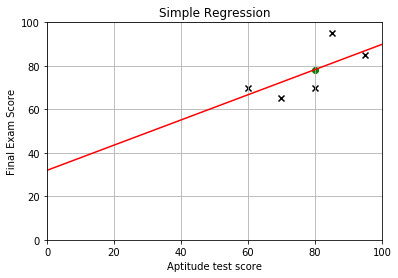

*** Iteration  120000  improvement 2.9502996085284394e-05  updatedRss:  330.5450550429787 
  B0:  31.963876684201864  B1:  0.5789431939214638 





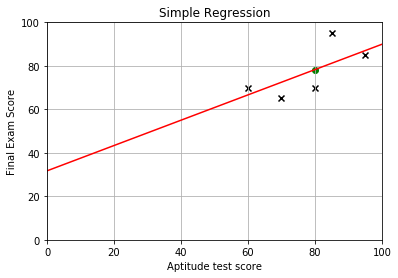

*** Iteration  130000  improvement 2.6863441348723427e-05  updatedRss:  330.2634302972271 
  B0:  31.72658795462098  B1:  0.5819140752251315 





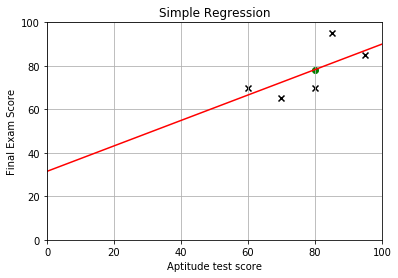

*** Iteration  140000  improvement 2.4460042709506524e-05  updatedRss:  330.0070017627678 
  B0:  31.50016269276307  B1:  0.5847489447043472 





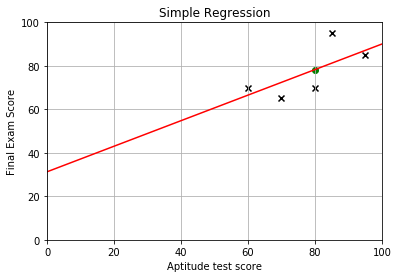

*** Iteration  150000  improvement 2.227166766033406e-05  updatedRss:  329.7735152020909 
  B0:  31.2841035512929  B1:  0.5874540292009442 





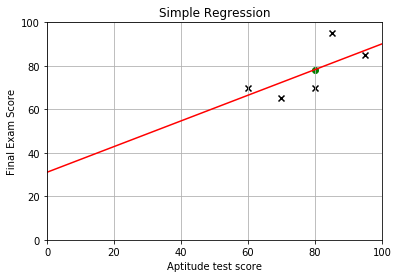

*** Iteration  160000  improvement 2.027908124091482e-05  updatedRss:  329.560918058029 
  B0:  31.077935952007465  B1:  0.5900352704881471 





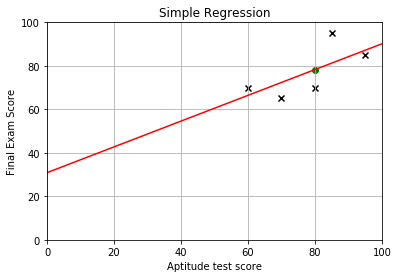

*** Iteration  170000  improvement 1.8464766071701888e-05  updatedRss:  329.36734141065165 
  B0:  30.881207044103007  B1:  0.5924983383098834 





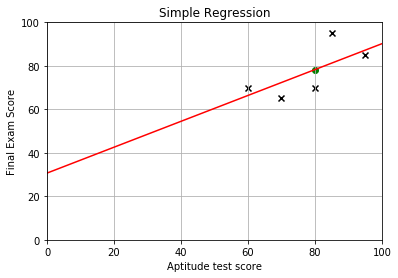

*** Iteration  180000  improvement 1.6812773253604973e-05  updatedRss:  329.19108354678025 
  B0:  30.69348470850514  B1:  0.5948486428442721 





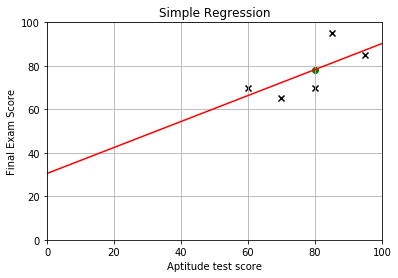

*** Iteration  190000  improvement 1.5308579065731465e-05  updatedRss:  329.03059500145804 
  B0:  30.514356609787683  B1:  0.5970913465770764 





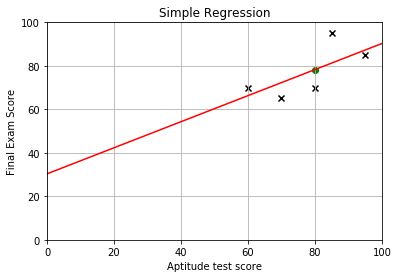

*** Iteration  200000  improvement 1.3938962524662202e-05  updatedRss:  328.8844649358739 
  B0:  30.343429289549135  B1:  0.5992313756487875 



Done
Final Results


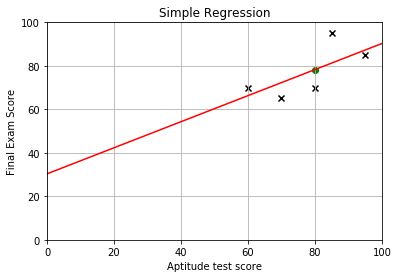

*** Iteration  200001  improvement 1.3938831784798822e-05  updatedRss:  328.8844509970421 
  B0:  30.343412594233996  B1:  0.5992315846762495 





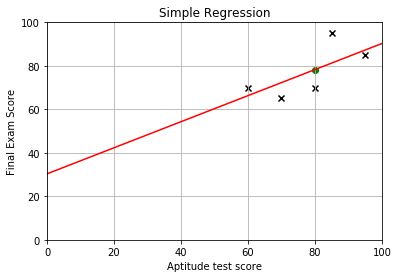

In [14]:
#Iteratively find best betas using gradient descent

#caution:  this dataset has very few points, so local gradient estimation has very little
#           gradient to go on in some dimensions.  this will make it slow and
#           highly dependent on your starting beta.  Dont use this on real problems!
#-----------------------------------------------------------


#setup the search
epsilon = 0.000001  #amount of change to beta; used to find emperical gradients of the cost surface near current beta values
convergenceThreshold = 0.00001  #If beta changes less than this amount, finish the search
improvement = 99999999.0  #start with an unreasonbly high improvement

learning_rate = 10.0
iteration_count = 0
max_iterations = 200000 #the max iterations you want to allow to prevent runaway processes - 
# start with a low value for max_iterations until you are sure your gradients are correct
done = False

rssHistory = []
beta0History = []
beta1History = []



t = np.array([[1, 80]])


print("Starting beta search")

while not done:
    #capture current rss value
    iteration_count = iteration_count+1
    #print(iterations)
    yhatold = np.dot(X,beta)
    oldRss = np.dot((yhatold-y).T , (yhatold-y))
    
    rssHistory.extend(oldRss)
    
    beta0History.extend([beta[0,0]])
    beta1History.extend([beta[1,0]])
    
    #call the student-written code to find the gradient of the cost surface
    #at the current coefficient values (beta)
    [rss0Gradient,rss1Gradient] = compute_gradient(X,y,beta,epsilon)
    
    #compute the updates to the betas using the learning rate
    b0Update = (rss0Gradient*learning_rate)
    b1Update = (rss1Gradient*learning_rate)

    
    #compute the new betas
    b0new = (beta[0,0]+b0Update).item()
    b1new = (beta[1,0]+b1Update).item()



    
    #set the new betas
    beta.itemset((0,0),b0new)  
    beta.itemset((1,0),b1new)             
    
    #test for convergence    
    #if total change in beta is small then done
    done = (iteration_count>max_iterations) | (np.sqrt(b0Update**2+b1Update**2)<convergenceThreshold)
    
    
    #test for amount of improvement in RSS
    yhat = np.dot(X,beta)
    updatedRss = np.dot((yhat-y).T , (yhat-y))
    
    
    #the following code will print an update after a certain number of iterations
    displayEveryIterations=10000  #how many iterations to run before displaying an update
    if not np.mod(iteration_count,displayEveryIterations):   
        ythat = np.dot(t,beta)
        beta0 = beta[0,0]
        beta1 = beta[1,0]
        plot_regression_results(X, y, t, ythat, beta0,beta1)
        improvement = oldRss-updatedRss
        print('*** Iteration ',iteration_count,
              ' improvement',improvement.item(),  
              ' updatedRss: ',updatedRss.item(),
              '\n',
              ' B0: ', beta0.item(), ' B1: ', beta1.item(),
              '\n\n\n' )

       

print("Done")
print("Final Results")

ythat = np.dot(t,beta)
beta0 = beta[0,0]
beta1 = beta[1,0]
plot_regression_results(X, y, t, ythat, beta0,beta1)
improvement = oldRss-updatedRss
print('*** Iteration ',iteration_count,
      ' improvement',improvement.item(),  
      ' updatedRss: ',updatedRss.item(),
      '\n',
      ' B0: ', beta0.item(), ' B1: ', beta1.item(),
      '\n\n\n' )




plot_regression_results(X, y, t, ythat, beta0,beta1)

(200001, 1)


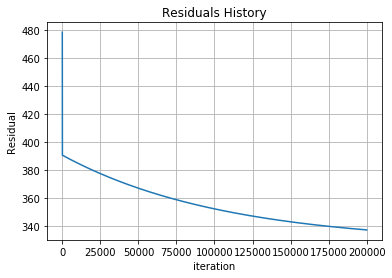

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


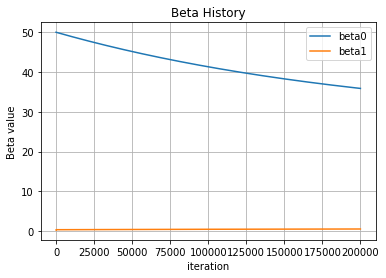

In [9]:
#convert list to numpy array

#plot_rss_history(rssHistory)

rssHistoryArray = np.asarray(rssHistory)
beta1HistoryArray = np.asarray(beta1History)
beta0HistoryArray = np.asarray(beta0History)

fig = plt.figure()
#plt.axis([0.,100.,0.,100.])
#add the points in black
print(rssHistoryArray.shape)
plt.plot(rssHistoryArray)
plt.title('Residuals History')
plt.ylabel('Residual')
plt.xlabel('iteration')
#plt.axis('equal')
plt.grid(True)
plt.show()


fig = plt.figure()
plt.plot(beta0History)
plt.plot(beta1History)
plt.legend(["beta0","beta1"])
plt.title('Beta History')
plt.xlabel('iteration')
plt.ylabel('Beta value')
#plt.axis('equal')
plt.grid(True)
plt.show()